In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from collections import Counter

/data4/tangsp/venv/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
nS, nA = 750, 25
gamma = 0.99
tol = 1e-10

In [3]:
# mask out actions that clinicians never taken
Q_mask = np.load('action_mask.npy')

In [4]:
traj_te = pickle.load(open('trajDr_te.pkl', 'rb'))
# traj_te += pickle.load(open('trajD_va.pkl', 'rb'))
# traj_te = pickle.load(open('trajD_tr.pkl', 'rb'))

trajectories = traj_te

In [5]:
states_te = []
for traj in trajectories:
    for transition in traj:
        states_te.append(transition['s'])

In [6]:
len(states_te)

55315

## Clinician policy

In [7]:
clinician_action_counts = np.zeros(nA, dtype=int)
for traj in trajectories:
    for transition in traj:
        clinician_action_counts[transition['a']] += 1

In [8]:
clinician_action_counts.reshape((5,5))

array([[14895,   215,    81,    95,   138],
       [25317,  1287,  1064,  1181,   722],
       [ 4449,   261,   247,   356,   405],
       [ 2114,   163,   242,   351,   390],
       [  570,    82,   124,   232,   334]])

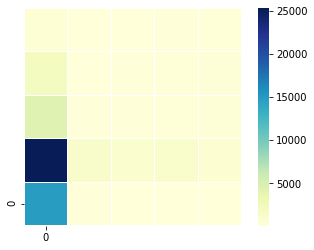

In [9]:
ax = sns.heatmap(
    clinician_action_counts.reshape((5,5)),
    square=True,cmap="YlGnBu", linewidths=.1, 
    xticklabels=5, yticklabels=5, 
)
ax.invert_yaxis()

## Learned optimal policy (q-learning)

In [10]:
Q_star = np.load('qlearn_Q.npy')
V_star = np.nanmax(Q_star, axis=1)

In [11]:
π_star = np.nanargmax(Q_star, axis=1)

In [12]:
action_counts = np.zeros(nA, dtype=int)
for s in states_te:
    a = pi_s = π_star[s]
    action_counts[a] += 1

In [13]:
action_counts.reshape((5,5))

array([[16612,   350,     0,   513,   159],
       [ 3379,  3966,  3906,  4813,  2393],
       [ 6744,   483,   573,   683,   619],
       [ 6464,   372,   248,   528,   767],
       [ 1534,     0,     0,     0,   209]])

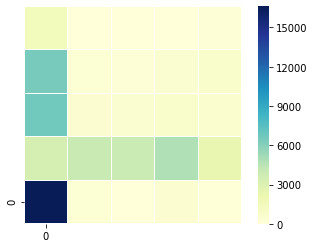

In [14]:
ax = sns.heatmap(
    action_counts.reshape((5,5)),
    square=True,cmap="YlGnBu", linewidths=.1, 
    xticklabels=5, yticklabels=5, 
)
ax.invert_yaxis()

In [15]:
((np.nanmax(Q_star, axis=1) - np.nanmin(Q_star, axis=1)) > 10).mean()

0.3253333333333333

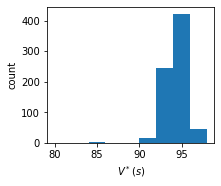

In [47]:
fig = plt.figure(figsize=(3,2.5))
plt.hist(V_star[V_star>=80], bins=np.arange(80,100,2))
plt.xlabel('$V^*(s)$')
plt.ylabel('count')
plt.savefig('fig/Vstar_hist.pdf', bbox_inches='tight')
plt.show()

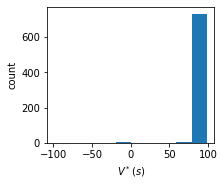

In [49]:
fig = plt.figure(figsize=(3,2.5))
plt.hist(V_star)
plt.xlabel('$V^*(s)$')
plt.ylabel('count')
plt.savefig('fig/Vstar_hist.pdf', bbox_inches='tight')
plt.show()

In [51]:
V_star[V_star < 0]

array([ -5.83997783, -12.14504781, -98.30922844, -35.73227893,
       -44.38514793, -13.42786999])

## Learned optimal policy (value iteration)

In [10]:
Q_STAR = np.load('value_iter_Q.npy')
V_STAR = np.load('value_iter_V.npy')

In [11]:
π_STAR = np.nanargmax(Q_STAR, axis=1)

In [12]:
action_counts = np.zeros(nA, dtype=int)
for s in states_te:
    a = pi_s = π_STAR[s]
    action_counts[a] += 1

In [13]:
action_counts.reshape((5,5))

array([[21407,   234,     0,   460,    71],
       [ 4657,  3247,  2798,  3960,  1838],
       [ 6571,   403,   238,   665,   279],
       [ 5613,   362,   248,   593,   485],
       [ 1091,     0,     0,    52,    43]])

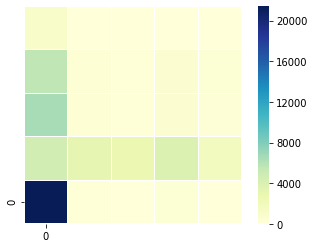

In [14]:
ax = sns.heatmap(
    action_counts.reshape((5,5)),
    square=True,cmap="YlGnBu", linewidths=.1, 
    xticklabels=5, yticklabels=5, 
)
ax.invert_yaxis()

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   1.,   2.,   1.,   1.,   0.,   0.,   0.,   0.,   2.,   0.,
          1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   2.,   1.,
          0.,   0.,   3.,  24., 593., 113.]),
 array([-0.98039216, -0.94117647, -0.90196078, -0.8627451 , -0.82352941,
        -0.78431373, -0.74509804, -0.70588235, -0.66666667, -0.62745098,
        -0.58823529, -0.54901961, -0.50980392, -0.47058824, -0.43137255,
        -0.39215686, -0.35294118, -0.31372549, -0.2745098 , -0.23529412,
        -0.19607843, -0.15686275, -0.11764706, -0.07843137, -0.03921569,
         0.        ,  0.03921569,  0.07843137,  0.11764706,  0.15686275,
         0.19607843,  0.23529412,  0.2745098 ,  0.31372549,  0.35294118,
         0.39215686,  0.43137255,  0.47058824,  0.50980392,  0.54901961,
         0.58823529,  0.62745098,  0.66666667,  0.70588235,  0.74509804,
 

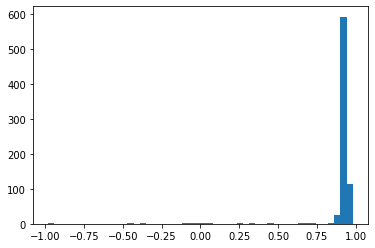

In [26]:
plt.hist(V_STAR, bins=50)